In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Amazon_Unlocked_Mobile.csv")

df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


C:\Users\my\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

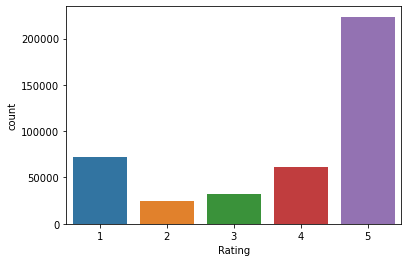

In [6]:
import seaborn as sns
sns.countplot(df['Rating'])

In [7]:
df.dtypes

Product Name     object
Brand Name       object
Price           float64
Rating            int64
Reviews          object
Review Votes    float64
dtype: object

<AxesSubplot:>

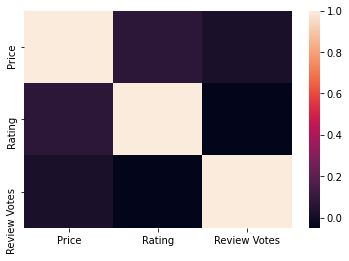

In [8]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [9]:
df.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [10]:
df['Rating'].isnull().values.any()

False

In [11]:
df['Reviews'].isnull().values.sum()

62

In [12]:
amazon=pd.DataFrame()
amazon['Rating']=df['Rating']
amazon['Reviews']=df['Reviews']
amazon.head()

,Rating,Reviews
0,5,I feel so LUCKY to have found this used (phone...
1,4,"nice phone, nice up grade from my pantach revu..."
2,5,Very pleased
3,4,It works good but it goes slow sometimes but i...
4,4,Great phone to replace my lost phone. The only...


In [13]:
amazon['Reviews'].isnull().values.sum()

62

In [14]:
amazon=amazon.dropna()
amazon['Reviews'].isnull().values.sum()

0

In [15]:
amazon.head()

,Rating,Reviews
0,5,I feel so LUCKY to have found this used (phone...
1,4,"nice phone, nice up grade from my pantach revu..."
2,5,Very pleased
3,4,It works good but it goes slow sometimes but i...
4,4,Great phone to replace my lost phone. The only...


C:\Users\my\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

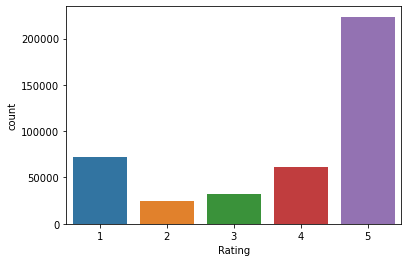

In [16]:
import seaborn as sns
sns.countplot(df['Rating'])

In [17]:
amazon=amazon.replace([1,2], 'negative')
amazon=amazon.replace(3, 'neutral')
amazon=amazon.replace([4,5], 'positive')
amazon.head()

,Rating,Reviews
0,positive,I feel so LUCKY to have found this used (phone...
1,positive,"nice phone, nice up grade from my pantach revu..."
2,positive,Very pleased
3,positive,It works good but it goes slow sometimes but i...
4,positive,Great phone to replace my lost phone. The only...


C:\Users\my\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

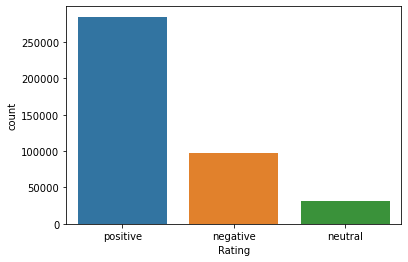

In [18]:
sns.countplot(amazon['Rating'])

In [19]:
amazon['Reviews'] = amazon['Reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
amazon.head()

,Rating,Reviews
0,positive,feel LUCKY have found this used (phone used ha...
1,positive,"nice phone, nice grade from pantach revue. Ver..."
2,positive,Very pleased
3,positive,works good goes slow sometimes very good phone...
4,positive,Great phone replace lost phone. only thing vol...


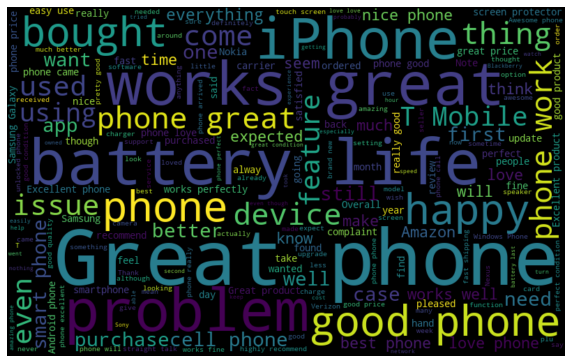

In [21]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in amazon['Reviews'][amazon['Rating'] == 'positive']
])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

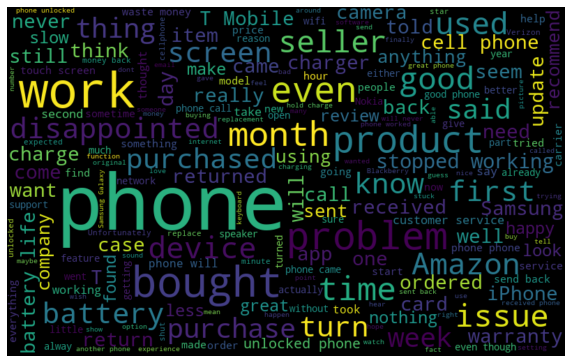

In [22]:
all_words = ' '.join([text for text in amazon['Reviews'][amazon['Rating'] == 'negative']
])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(amazon['Reviews']).todense()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=bow
y=amazon['Rating']
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import precision_score

clf = RandomForestClassifier(n_estimators=10,
                                  random_state=0)
clf.fit(X, y)

C:\Users\my\anaconda3\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


RandomForestClassifier(n_estimators=10, random_state=0)

In [26]:
y_pred=clf.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
print("Accuracy : ",accuracy)

C:\Users\my\anaconda3\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Accuracy :  0.9765817584223501


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[27667,    54,  1316],
       [  206,  8308,   955],
       [  273,   103, 85252]], dtype=int64)

In [40]:
clf.predict(bow_vectorizer.transform(['worse']))

array(['negative'], dtype=object)

In [41]:
clf.predict(bow_vectorizer.transform(['bad bad phone']))

array(['negative'], dtype=object)

In [42]:
clf.predict(bow_vectorizer.transform(['Love this phone simply awesome!']))

array(['positive'], dtype=object)